In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys

from astropy import units as u
from astroquery.jplhorizons import Horizons
from astropy.time import Time
from astropy.timeseries import TimeSeries

import starry
sys.path.append("../volcano")
from utils import get_body_ephemeris
  
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18

%config InlineBackend.figure_format = 'retina'

np.random.seed(42)
starry.config.lazy = False

### 2011 Keck observations

<img src="io_pele.png" width=800>

Pele is J

Pre-computing some matrices... Done.
Compiling `expand_spot`... Done.
Compiling `render`... /Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()
Done.


Central longitude 219.514413 deg


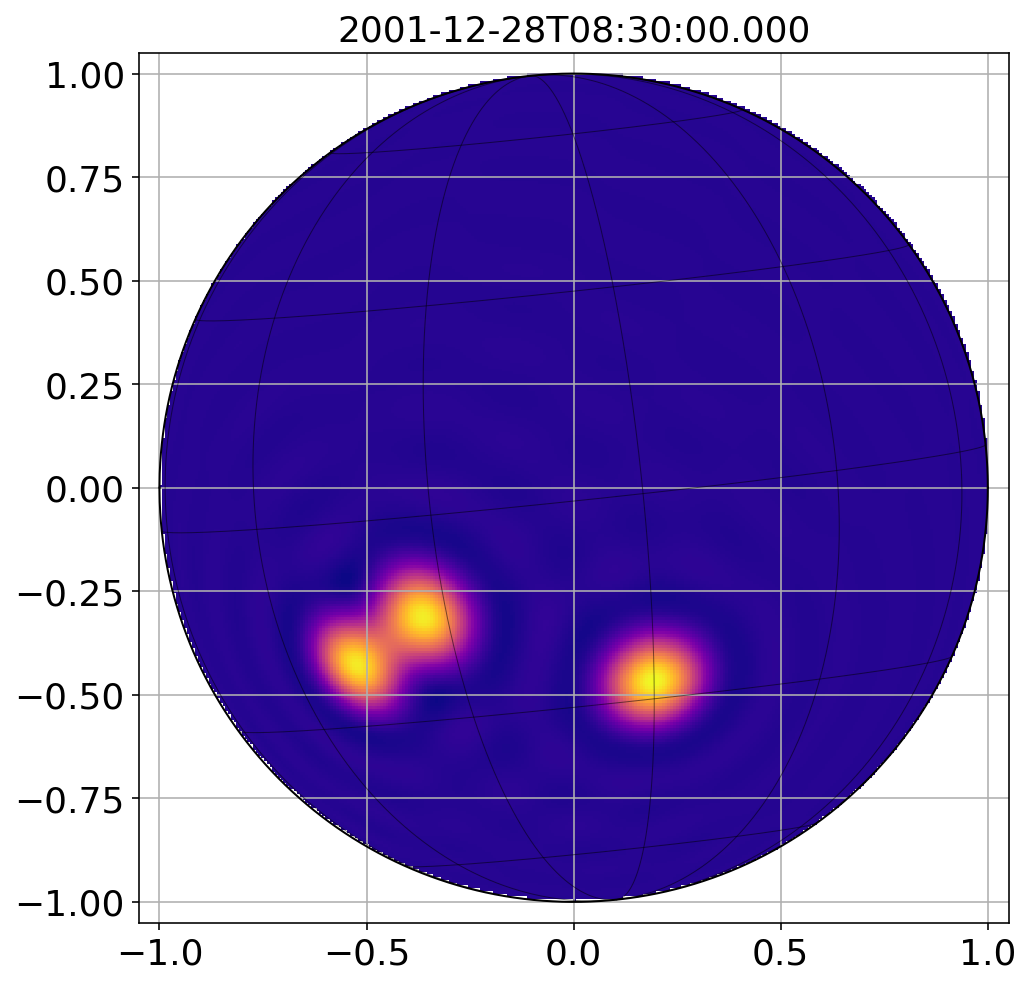

In [2]:
start = Time("2001-12-28T08:30:00", format="isot")
end = Time("2001-12-28T08:40:00", format="isot")

times = Time(np.linspace(start.mjd, end.mjd, 200), format="mjd")

io_eph = get_body_ephemeris(times, step="1m")

# Create a Starry map and place the two volcanos on the surface of Io
map = starry.Map(ydeg=30)

# J
map.add_spot(amp=0.01, sigma=0.005, lat=-20.4, lon=360 - 256.6)
# K
map.add_spot(amp=0.01, sigma=0.005, lat=-14.4, lon=360 - 243.9)
# M
map.add_spot(amp=0.01, sigma=0.005, lat=-27.4, lon=360 - 210.4)


idx = 0

fig, ax = plt.subplots(figsize=(8, 8))

# Plot io
map.obl = io_eph["obl"][idx]
map.inc = io_eph["inc"][idx]
map.show(ax=ax, theta=io_eph["theta"][idx])
ax.axis("on")

timestamp = times[idx].isot
ax.set_aspect(1)
ax.grid()
ax.set_title(timestamp)

print("Central longitude", io_eph["theta"][idx])

Pre-computing some matrices... Done.
Compiling `expand_spot`... Done.
Compiling `render`... Done.


Central longitude 251.341368 deg


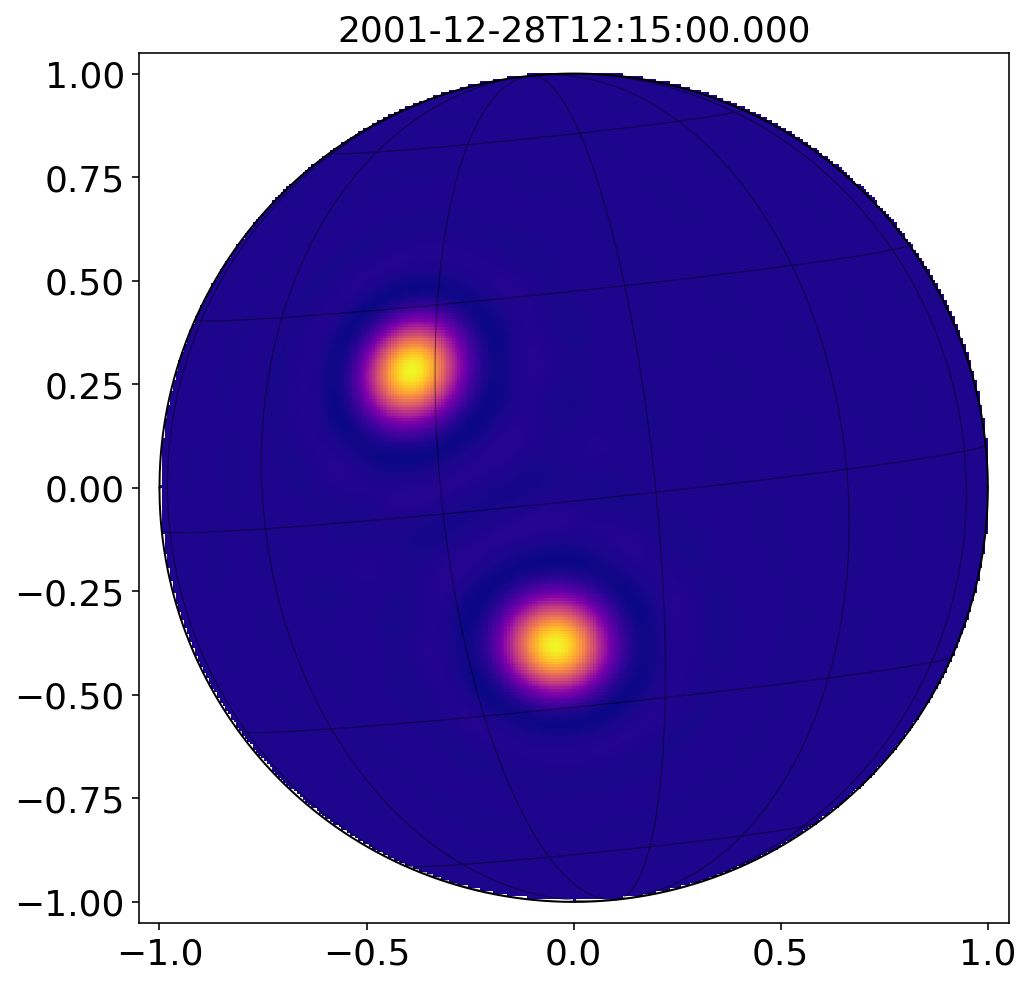

In [3]:
start = Time("2001-12-28T12:15:00", format="isot")
end = Time("2001-12-28T12:20:00", format="isot")

times = Time(np.linspace(start.mjd, end.mjd, 200), format="mjd")

io_eph = get_body_ephemeris(times, step="1m")

# Create a Starry map and place the two volcanos on the surface of Io
map = starry.Map(ydeg=30)

# J
map.add_spot(amp=0.01, sigma=0.005, lat=-20.4, lon=360 - 256.6)

# G
map.add_spot(amp=0.01, sigma=0.005, lat=20.3, lon=360 - 274.1)

idx = 0

fig, ax = plt.subplots(figsize=(8, 8))

# Plot io
map.obl = io_eph["obl"][idx]
map.inc = io_eph["inc"][idx]
map.show(ax=ax, theta=io_eph["theta"][idx])
ax.axis("on")

timestamp = times[idx].isot
ax.set_aspect(1)
# ax.grid()
ax.set_title(timestamp)

print("Central longitude", io_eph["theta"][idx])

### Ocultation of Io by Europa from de Kleer 2017


<img src="io_occultation_resolved.png">

Pre-computing some matrices... Done.
Compiling `expand_spot`... Done.
Compiling `render`... Done.


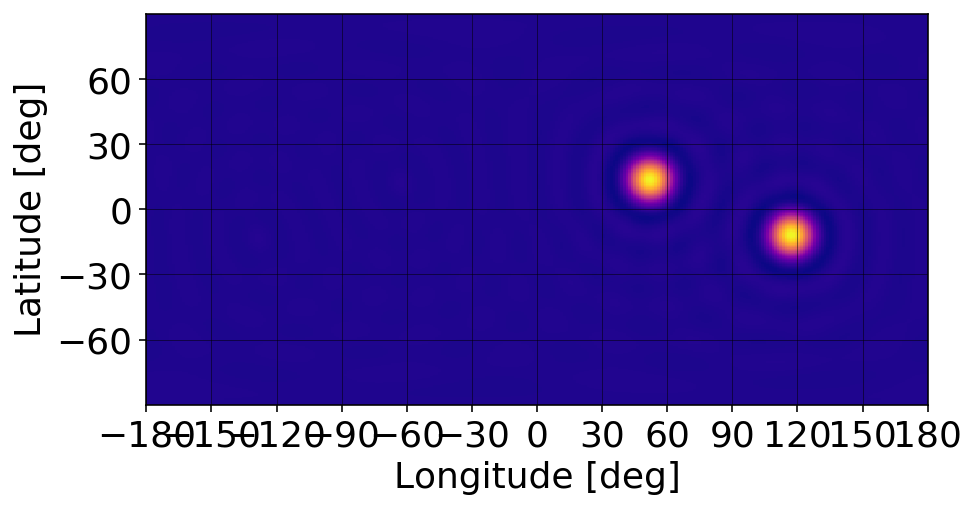

In [4]:
# Create a Starry map and place the two volcanos on the surface of Io
map = starry.Map(ydeg=20)

# Loki patera (Cantrall et. al. 2018)
map.add_spot(amp=0.01, sigma=0.01, lat=13.4, lon=360 - 308.5)
# Pillan patera
map.add_spot(amp=0.01, sigma=0.01, lat=-12.0, lon=360 - 243.5)

map.show(projection="rect")

In [5]:
start = Time("2015-03-08T06:16:24", format="isot")
end = Time("2015-03-08T06:25:00", format="isot")

times = Time(np.linspace(start.mjd, end.mjd, 200), format="mjd")

io_eph = get_body_ephemeris(times, step="1m")
europa_eph = get_body_ephemeris(
    times, body_id="502", step="1m", return_orientation=False
)

Text(0.5, 1.0, '2015-03-08T06:16:24.000')

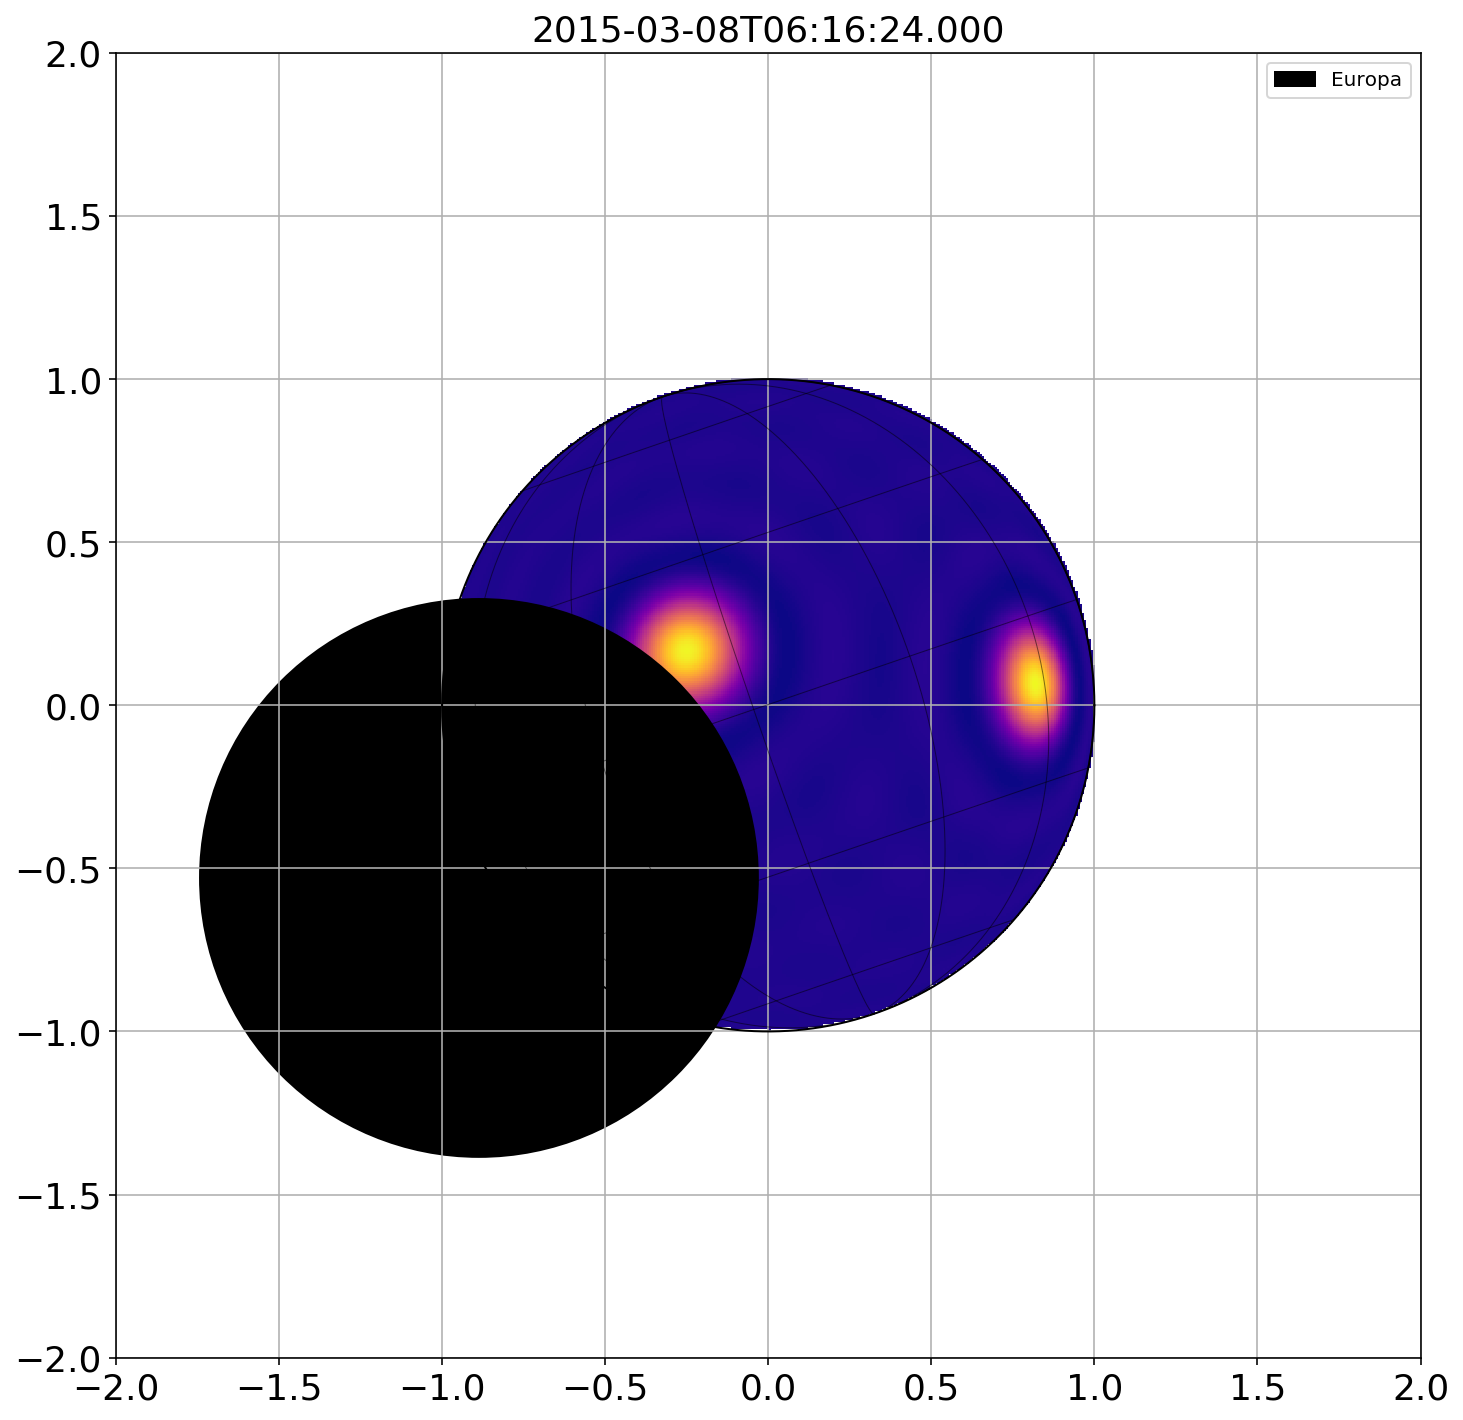

In [6]:
idx = 0

# Convert everything to units where the radius of Io = 1
radius_europa = europa_eph["ang_width"][idx] / io_eph["ang_width"][idx]
rel_ra = (europa_eph["RA"] - io_eph["RA"]).to(u.arcsec) / (
    0.5 * io_eph["ang_width"].to(u.arcsec)
)
rel_dec = (europa_eph["DEC"] - io_eph["DEC"]).to(u.arcsec) / (
    0.5 * io_eph["ang_width"].to(u.arcsec)
)


def plot_circle(ax, r1, rad1):
    c1 = plt.Circle((r1[0], r1[1]), rad1, color="black")

    ax.add_artist(c1)

    ax.legend([c1], ["Europa"])


fig, ax = plt.subplots(figsize=(12, 12))

# Plot io
map.obl = io_eph["obl"][idx]
map.inc = io_eph["inc"][idx]
map.show(ax=ax, theta=io_eph["theta"][idx])
ax.axis("on")

# Plot Europa
plot_circle(
    ax, [-rel_ra[idx], rel_dec[idx]], radius_europa
)  # Positive RA is to the left

timestamp = times[idx].isot

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
ax.set_aspect(1)
ax.grid()
ax.set_title(timestamp)

In [7]:
def rotate_vector(r, theta):
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return np.dot(R, r)

Text(0.5, 1.0, '2015-03-08T06:16:24.000')

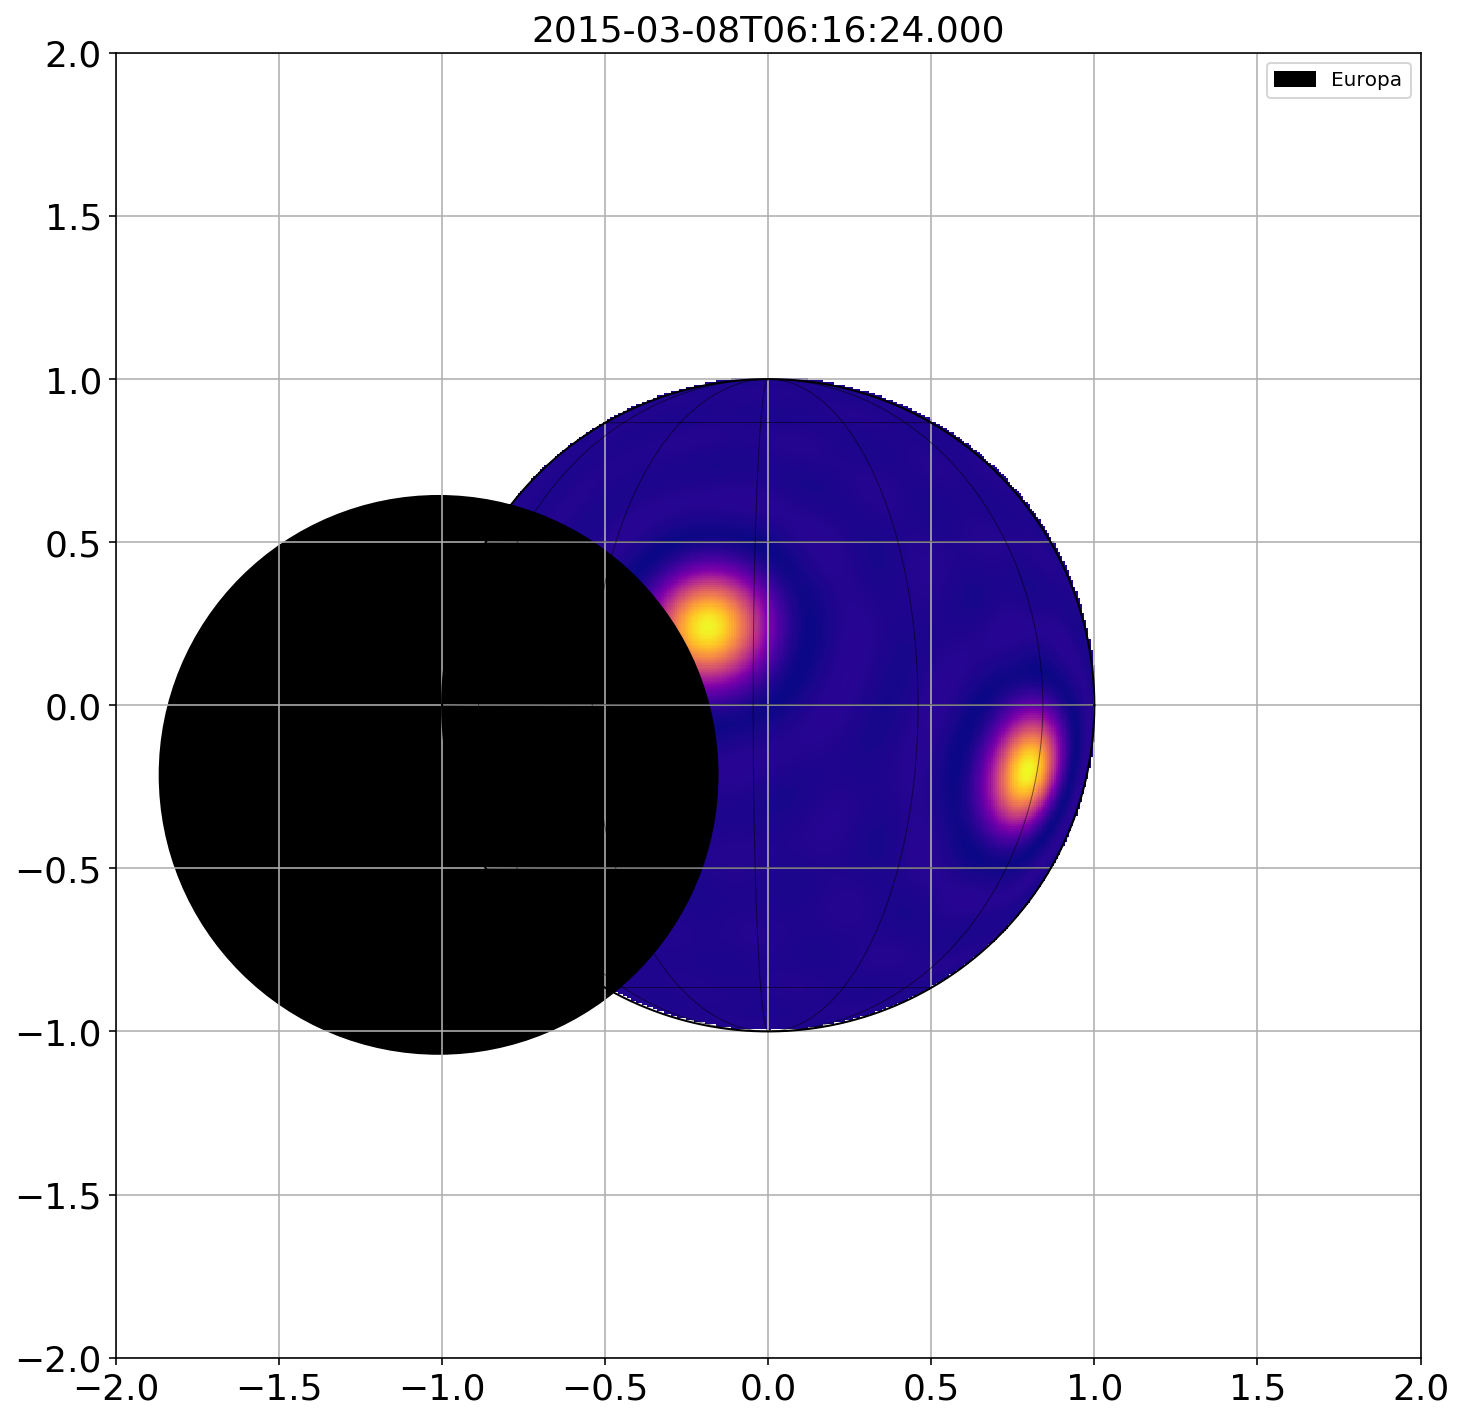

In [8]:
rot_angle = -io_eph["obl"][idx].value

r_rot = rotate_vector([-rel_ra[idx], rel_dec[idx]], rot_angle * np.pi / 180)


fig, ax = plt.subplots(figsize=(12, 12))

# Plot io
map.obl = io_eph["obl"][idx] + rot_angle * u.deg
map.inc = io_eph["inc"][idx]
map.show(ax=ax, theta=io_eph["theta"][idx])
ax.axis("on")

# Plot Europa
plot_circle(ax, r_rot, radius_europa)

timestamp = times[idx].isot

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
ax.set_aspect(1)
ax.grid()
ax.set_title(timestamp)